
# **MODELOS DE CLASIFICACIÓN**

### **Librerias**

In [31]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import time  # For tracking execution time

# Importing modules from scikit-learn for model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.pipeline import Pipeline  # For creating machine learning pipelines
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import Ridge, Lasso  # For regression models
from sklearn.ensemble import RandomForestRegressor  # For ensemble regression model

# Importing XGBoost library for regression
from xgboost import XGBRegressor  # For gradient boosting regression

# Importing metrics for model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # For evaluating regression models

In [32]:
df = pd.read_csv('..\df_final.csv')  # Load the dataset
print("Filas disponibles:", len(df))


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_15048\3201878507.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\df_final.csv')  # Load the dataset


Filas disponibles: 1535519


## **Balanceo de clases**

En *Machine Learning*, una clase se refiere a una de las categorías en las que se agrupan las observaciones dentro de un problema de clasificación. En un conjunto de datos etiquetado, cada instancia está asociada a una clase específica, permitiendo que un modelo aprenda a predecir la categoría correcta para nuevas observaciones.
Cuando el número de ejemplos en cada clase está desproporcionado, se habla de un **desbalance de clases**. Esto ocurre cuando una clase tiene significativamente más ejemplos que otra(s), afectando el desempeño del modelo de clasificación. En estas situaciones, el algoritmo tiende a favorecer la clase mayoritaria, lo que puede llevar a una alta precisión global, pero con un desempeño deficiente en la clase minoritaria.

Para mitigar este problema, se emplean técnicas de balanceo de clases, cuyo objetivo es modificar la distribución de los datos o ajustar la forma en que el modelo aprende. En este estudio, se implementarán tres enfoques principales:

* SMOTE (Synthetic Minority Over-sampling Technique): Es una técnica de sobremuestreo que genera nuevas instancias sintéticas de la clase minoritaria a partir de interpolaciones entre ejemplos existentes.
* ADASYN (Adaptive Synthetic Sampling): Similar a SMOTE, pero con la particularidad de generar más ejemplos en aquellas regiones donde la clase minoritaria es más dispersa, mejorando la representatividad del conjunto de datos.
* Ajuste de pesos con `class_weight='balanced`: Método que modifica la función de costo del modelo para penalizar más los errores en la clase minoritaria, sin necesidad de generar nuevos datos.


## **Contextualización**

Pasra la evaluación de los moodelos de clasificación, se eligió la variable `LOCALITY` como objetivo de los modelos de clasificación con el fin de explorar la posibilidad de identificar microclimas urbanos dentro de la ciudad de Barranquilla. Cada localidad representa una zona geográfica con características urbanas, ambientales y espaciales distintas (algunas más cercanas a cuerpos de agua, otras más densamente urbanizadas o con menor cobertura vegetal).

Al utilizar variables meteorológicas como temperatura, humedad, presión y viento como entradas del modelo, se busca evaluar si estas condiciones permiten distinguir de manera significativa entre las distintas zonas de la ciudad. Esta elección permite no solo explorar la variabilidad climática a escala intraurbana, sino también probar la capacidad de los modelos de ML para detectar patrones geográficos sutiles basados en datos atmosféricos.

### **Verificación de balance de clases**

LOCALITY
Sur          307104
Oriente      307104
Occidente    307104
Norte        307104
Centro       307103
Name: count, dtype: int64


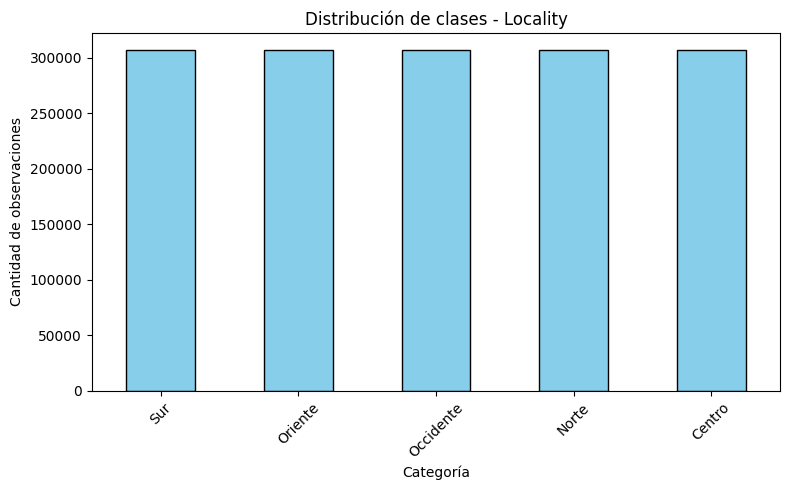

In [4]:
class_counts = df['LOCALITY'].value_counts()

# Mostrar el conteo
print(class_counts)

# Visualización del balance de clases
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de clases - Locality")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de observaciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La distribución de las clases en la variable "localidad" es bastante equilibrada, ya que cada localidad (Sur, Oriente, Occidente, Norte y Centro) tiene un número similar de registros, con una pequeña diferencia en la localidad Centro. Dado que no se observa un desbalance significativo entre las clases, no es necesario aplicar técnicas de balanceo de clases, como SMOTE o ADASYN, para este conjunto de datos.

## **Modelos Benchmark**

Ya teniendo la certeza de que las clases seencuentran balanceada, se procede entonces a ejecutar los modelos de referencia para el modelo de clasificación, en este caso ejecutaremos K-Nearest Neighbors (KNN), Clasificación de Bayes, Regresión Logística (Regularización L1/L2 - Ridge, Lasso respectivamente), Decision Tree, Random Forest, XGBoost (Lime), y Máquinas de Soporte Vectorial (SVM). Para cada caso analizaremos...

## **Implementación de los modelos (sin optimización)**

### **KNN (K-Nearest Neighbors)**

In [2]:
# === Librerías necesarias ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [33]:
# === Codificar variable objetivo: LOCALITY ===
le = LabelEncoder()
df['LOCALITY_encoded'] = le.fit_transform(df['LOCALITY'])

# ===  Seleccionar variables de entrada (X) ===
features = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M',
            'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF',
            'T2MDEW', 'T2MWET', 'WS50M', 'SolarIndex']

X = df[features]
y = df['LOCALITY_encoded']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Escalar ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy para k=1: 0.2016
Accuracy para k=2: 0.2209
Accuracy para k=3: 0.2065
Accuracy para k=4: 0.1943
Accuracy para k=5: 0.1869
Accuracy para k=6: 0.1835
Accuracy para k=7: 0.1795
Accuracy para k=8: 0.1687
Accuracy para k=9: 0.1656
Accuracy para k=10: 0.1710
Accuracy para k=11: 0.1731
Accuracy para k=12: 0.1701
Accuracy para k=13: 0.1681
Accuracy para k=14: 0.1709
Accuracy para k=15: 0.1752
Accuracy para k=16: 0.1807
Accuracy para k=17: 0.1859
Accuracy para k=18: 0.1893
Accuracy para k=19: 0.1912
Accuracy para k=20: 0.1936

Mejor accuracy: 0.2209 con k=2


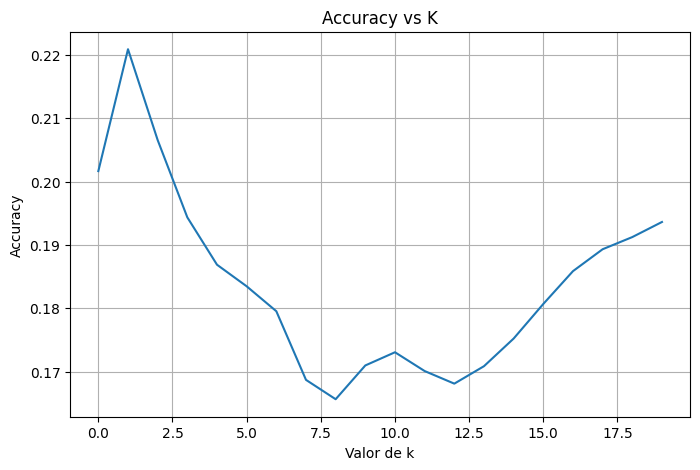

In [31]:
accuracy_vals = []
best_acc = 0
best_k = 1

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    if acc > best_acc:
        best_acc = acc
        best_k = k

    accuracy_vals.append(acc)
    print(f"Accuracy para k={k}: {acc:.4f}")

print(f"\nMejor accuracy: {best_acc:.4f} con k={best_k}")

# Graficar resultados
pd.DataFrame(accuracy_vals).plot(figsize=(8,5), legend=False)
plt.title("Accuracy vs K")
plt.xlabel("Valor de k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

En el modelo KNN, el parámetro k indica la cantidad de vecinos cercanos que se consideran para clasificar una observación. Para encontrar el valor óptimo, se evaluaron diferentes valores de k entre 1 y 20, obteniendo como mejor resultado un accuracy del 22.09% con k=2. Este valor fue utilizado en la configuración final del modelo, al ser el que logró el mayor nivel de acierto al clasificar las localidades en función de las variables meteorológicas.

In [32]:


# === Definir modelo KNN ===
knn = KNeighborsClassifier(n_neighbors=2)

# === Validación cruzada ===
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento final y predicción (medimos tiempo) ===
start_time = time.time()

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Tiempo de cómputo (KNN sin optimización): {elapsed_time:.4f} segundos")


# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Cross-validation scores: [0.22099519 0.2218139  0.22179995 0.22197309 0.22196379]
Promedio de accuracy en CV: 0.22170918574600978
Tiempo de cómputo (KNN sin optimización): 20.1014 segundos
=== Classification Report ===
              precision    recall  f1-score   support

      Centro       0.19      0.34      0.24     92131
       Norte       0.34      0.48      0.40     92131
   Occidente       0.16      0.16      0.16     92131
     Oriente       0.18      0.11      0.14     92132
         Sur       0.10      0.01      0.03     92131

    accuracy                           0.22    460656
   macro avg       0.19      0.22      0.19    460656
weighted avg       0.19      0.22      0.19    460656



El modelo KNN fue evaluado mediante validación cruzada con 5 particiones (5-fold cross-validation), arrojando valores de precisión (accuracy) bastante consistentes entre los diferentes pliegues: 0.2210, 0.2218, 0.2218, 0.2220 y 0.2220. Estas puntuaciones reflejan un rendimiento estable, aunque modesto, con un promedio general de accuracy de 0.2217, es decir, el modelo logró clasificar correctamente la localidad en aproximadamente el 22.1% de los casos. Este desempeño limitado puede atribuirse a la similitud entre condiciones meteorológicas de distintas zonas de la ciudad, lo que dificulta que el modelo identifique patrones claramente diferenciables.

El tiempo de cómputo total para entrenar el modelo y realizar las predicciones fue de 22.05 segundos, lo que servirá como referencia para evaluar la eficiencia de versiones optimizadas del modelo, como aquellas que utilicen estructuras de datos como KD-Tree o Ball-Tree.

En cuanto a las métricas por clase, el modelo mostró mayor capacidad de predicción para la localidad Norte, alcanzando una precisión de 0.34, un recall de 0.48 y un F1-score de 0.40. Esto indica que, cuando el modelo predice “Norte”, acierta el 34% de las veces, y que de todos los casos reales de esa localidad, logra identificar correctamente el 48%. Por el contrario, otras zonas como Sur y Oriente presentaron desempeños notablemente más bajos, con F1-scores de apenas 0.03 y 0.14, respectivamente, lo cual revela una alta tasa de errores al clasificar estas localidades.

El accuracy global del modelo fue del 22%, lo que confirma que la tarea de clasificación entre zonas geográficas basándose únicamente en variables meteorológicas representa un reto considerable. Además, los promedios macro y ponderado (weighted) para precisión, recall y F1-score se ubicaron en torno a 0.19–0.22, indicando que el bajo rendimiento es consistente a lo largo de todas las clases, sin que una en particular esté sesgando los resultados generales.

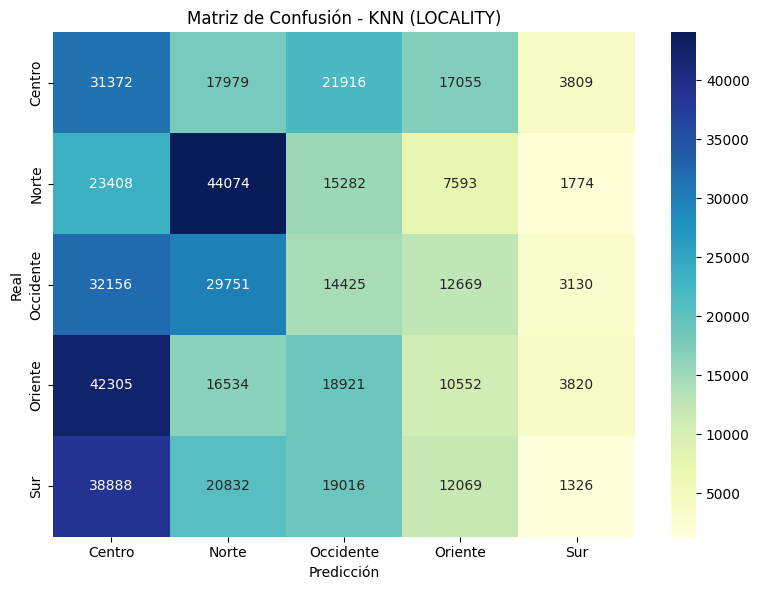

In [ ]:
# ===  Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='YlGnBu')
plt.title("Matriz de Confusión - KNN (LOCALITY)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


La matriz de confusión presentada resume el desempeño del modelo KNN al clasificar las cinco localidades de Barranquilla: Centro, Norte, Occidente, Oriente y Sur. En ella, las filas representan las localidades reales y las columnas las predicciones del modelo. Los valores diagonales (de arriba a la izquierda hacia abajo a la derecha) indican las predicciones correctas, mientras que los demás representan errores de clasificación.

A simple vista, se observa que el modelo tiene un mejor desempeño reconociendo correctamente las muestras de la localidad Norte, con 44.074 predicciones acertadas. Sin embargo, también se perciben altos niveles de confusión entre localidades vecinas o climáticamente similares. Por ejemplo, se evidencia lo siguiente:

* Muchas observaciones de Centro fueron clasificadas como Occidente (21.916) u Oriente (17.055).

* Un número considerable de observaciones reales de Oriente fueron clasificadas como Centro (42.305) o Occidente (18.921).

* Las predicciones correctas para Sur fueron apenas 1.326 (muy por debajo de sus errores hacia Centro, Norte u Occidente, con más de 38.000, 20.000 y 19.000 respectivamente).

Este patrón sugiere que el modelo sigue teniendo dificultades para distinguir claramente entre ciertas zonas de la ciudad, lo cual puede deberse a similitudes en sus variables meteorológicas o a la cercanía geográfica entre localidades que comparten microclimas.

En general, la matriz confirma lo que ya se había evidenciado en el classification report: el modelo tiende a confundirse con frecuencia, especialmente en zonas como Sur y Oriente, y acierta con mayor facilidad en localidades que presentan patrones climáticos más diferenciados (como Norte).

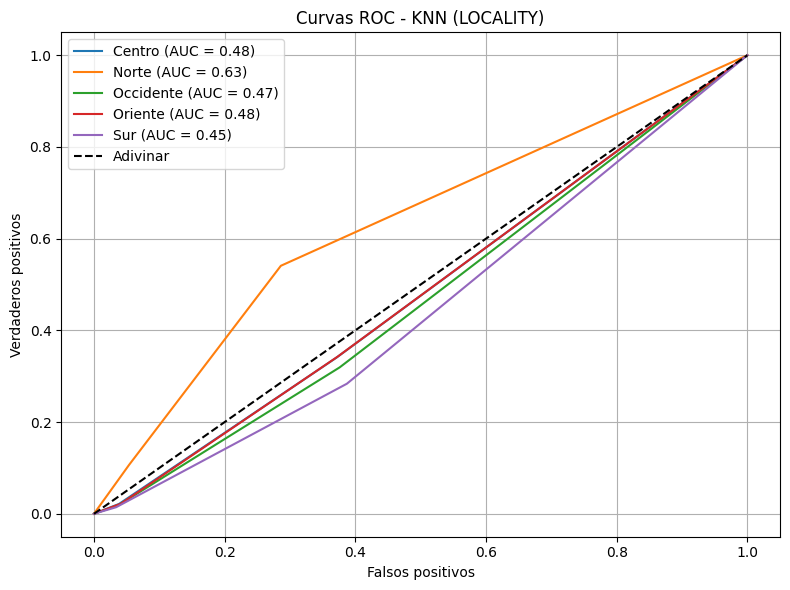

In [ ]:

# === Curvas ROC por clase + AUC por clase ===
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - KNN (LOCALITY)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Las curvas ROC obtenidas evidencian una capacidad moderadamente limitada del modelo para distinguir entre las distintas localidades de Barranquilla, con excepción de la localidad Norte, que presenta un AUC de 0.63. Este valor sugiere un desempeño aceptable, aunque no óptimo, en la capacidad del modelo para identificar correctamente esta clase frente a las demás. Para el resto de las localidades, los valores de AUC se mantienen cercanos al umbral de referencia aleatoria (0.50), con Centro y Oriente en 0.48, Occidente en 0.47 y Sur en 0.45. Estos resultados confirman que, aunque el modelo muestra una ligera mejora general respecto a la ejecución anterior, sigue teniendo dificultades importantes para diferenciar entre la mayoría de las zonas geográficas. En conjunto, las curvas ROC refuerzan la conclusión de que el modelo logra cierto grado de discriminación para la localidad Norte, pero no presenta una capacidad robusta y generalizable para separar correctamente todas las clases. Esto limita su utilidad como clasificador efectivo en un contexto donde se requiere precisión en la identificación de microclimas urbanos.





In [ ]:

# === AUC promedio (macro) ===
auc_macro = np.mean(auc_scores)
print(f"AUC promedio (macro): {auc_macro:.4f}")

AUC promedio (macro): 0.5015


Además, el AUC (Area Under the Curve) promedio (macro) calculado para el modelo fue de 0.5015, lo que indica que, en promedio, la capacidad del modelo para distinguir correctamente entre una clase y el resto es apenas ligeramente superior al azar (que sería 0.50). 

### **Bayes**

In [48]:

from sklearn.naive_bayes import GaussianNB

# --- División y escalado ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Entrenamiento y medición de tiempo ---
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Tiempo de entrenamiento (Naive Bayes sin optimización): {training_time:.4f} segundos")

# --- Predicción y métricas ---
y_pred = nb_model.predict(X_test)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Tiempo de entrenamiento (Naive Bayes sin optimización): 0.2338 segundos

Reporte de Clasificación:
              precision    recall  f1-score   support

      Centro       0.25      0.03      0.06     92131
       Norte       0.31      0.99      0.47     92131
   Occidente       0.19      0.02      0.03     92131
     Oriente       0.25      0.28      0.26     92132
         Sur       0.24      0.11      0.15     92131

    accuracy                           0.28    460656
   macro avg       0.25      0.28      0.19    460656
weighted avg       0.25      0.28      0.19    460656



El modelo de Clasificación Bayesiana fue entrenado utilizando el algoritmo GaussianNB, obteniendo un tiempo de entrenamiento extremadamente bajo de 0.2045 segundos, lo cual representa una ventaja considerable en términos de eficiencia computacional. Sin embargo, en cuanto a desempeño predictivo, el modelo alcanzó una precisión global (accuracy) de 28%, lo que significa que logró clasificar correctamente la localidad correspondiente en menos de un tercio de los casos. Esto sugiere que, aunque el modelo es rápido, su capacidad para diferenciar entre zonas geográficas a partir de condiciones meteorológicas aún es limitada.

El análisis por clase revela un patrón de desempeño muy desigual. La clase “Norte” sobresale con un recall de 0.99, lo que indica que el modelo identificó correctamente casi todos los casos reales de esa localidad. No obstante, este resultado también sugiere un sesgo fuerte hacia dicha clase, ya que las demás localidades presentan valores de recall significativamente más bajos: Centro (0.03), Occidente (0.02), Oriente (0.28) y Sur (0.11). En cuanto al F1-score, que equilibra precisión y recall, solo Norte alcanza un valor destacable de 0.47, mientras que las demás clases tienen puntuaciones muy bajas (de 0.03 a 0.26), reflejando una falta de equilibrio en la predicción.

El promedio macro de recall fue 0.28, ligeramente superior al de precisión (0.25) y F1-score (0.19). Debido al fuerte desequilibrio entre clases, se opta por utilizar recall macro promedio como métrica principal de validación, ya que permite evaluar qué tan bien se están reconociendo correctamente todas las clases sin verse influenciado por el tamaño de cada una.

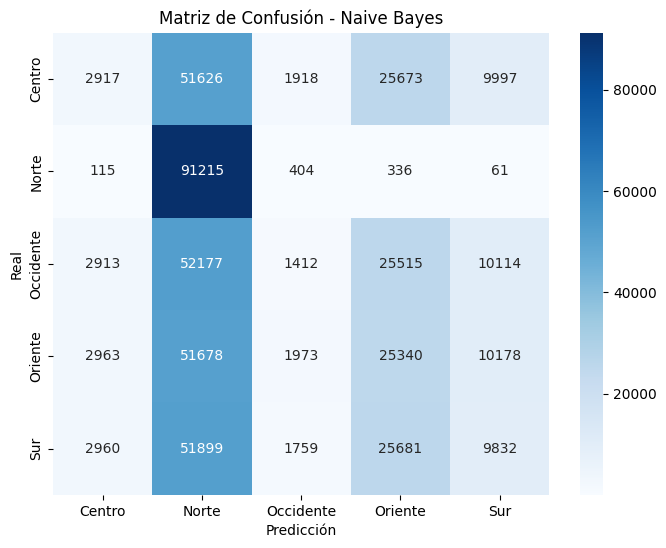

In [35]:
# --- Matriz de confusión con nombres correctos ---
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.arange(len(le.classes_)))
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


La matriz de confusión muestra que el modelo Naive Bayes tiene un fuerte sesgo hacia la clase “Norte”, ya que la mayoría de las predicciones, sin importar la clase real, terminan clasificadas como “Norte”. Por ejemplo, de los casos reales de “Occidente”, más de 52 mil fueron clasificados incorrectamente como “Norte”, y solo unos 2.900 fueron correctamente identificados. Esta tendencia se repite en todas las demás clases.

Aunque el modelo logra identificar con precisión casi todos los casos reales de “Norte” (lo que se ve en la celda [Norte, Norte] con más de 91 mil aciertos), su capacidad para diferenciar entre las otras localidades es muy baja, ya que la mayoría son absorbidas por esa clase dominante.

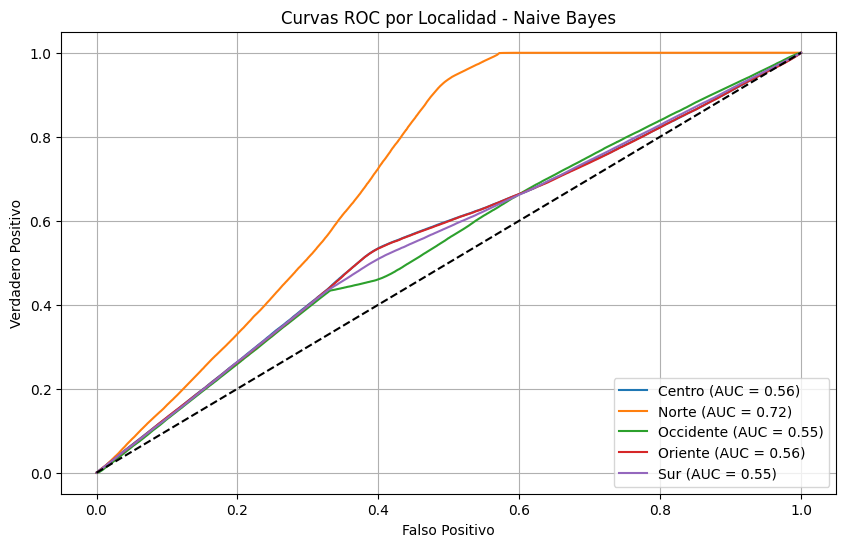

In [ ]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc
)
# --- ROC y AUC ---
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = nb_model.predict_proba(X_test)

# ROC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro y macro promedio
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Curvas ROC con nombres
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadero Positivo")
plt.title("Curvas ROC por Localidad - Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# --- Tabla resumen de métricas ---
metrics_df = pd.DataFrame({
    "Modelo": ["Clasificación Bayesiana"],
    "precision": [precision_score(y_test, y_pred, average="macro")],
    "recall": [recall_score(y_test, y_pred, average="macro")],
    "accuracy": [accuracy_score(y_test, y_pred)],
    "f1-score": [f1_score(y_test, y_pred, average="macro")],
    "AUC": [roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")]
})


Las curvas ROC por localidad confirman el comportamiento desigual del modelo Naive Bayes. La única clase con una curva claramente separada de la línea base (AUC > 0.7) es Norte, lo que indica que el modelo tiene una capacidad real de distinguir correctamente los casos de esa clase. Su AUC de 0.72 respalda lo observado en la matriz de confusión y el classification report, predice muy bien "Norte", pero "descuida" las demás.

Para las otras localidades, los valores de AUC se encuentran entre 0.55 y 0.56, muy cercanos al azar (0.5), lo cual refleja que el modelo no tiene una capacidad significativa de discriminar entre clases en esos casos. Esto refuerza la conclusión de que, aunque el modelo es rápido, no está captando patrones diferenciadores suficientes para predecir con fiabilidad la localidad en función de las variables meteorológicas disponibles.

In [39]:
print("\nTabla de métricas")
display(metrics_df)



Tabla de métricas


,Modelo,precision,recall,accuracy,f1-score,AUC
0,Clasificación Bayesiana,0.246438,0.283761,0.283761,0.192059,0.586175


La tabla de métricas del modelo Naive Bayes muestra un rendimiento modesto y consistente con el resto de las evaluaciones. El accuracy general fue de 0.2837, lo que significa que el modelo acierta la predicción de la localidad en aproximadamente un 28% de los casos. La precisión (0.246) y el **recall macro promedio** (0.283) son similares, lo que indica que el modelo no solo comete errores al clasificar, sino que también deja de identificar correctamente muchas muestras de clases diferentes a la dominante.

El F1-score promedio fue de apenas 0.192, reflejando la incapacidad del modelo para balancear precisión y sensibilidad en la mayoría de las clases. Por otro lado, el AUC macro promedio fue 0.586, apenas por encima del valor aleatorio (0.5), lo que sugiere que la capacidad del modelo para distinguir entre clases es limitada.

#### **Métrica seleccionada**
Para evaluar el desempeño del modelo Naive Bayes, se seleccionó el recall macro promedio como métrica principal de validación. Esta métrica calcula el recall de cada clase por separado y luego hace un promedio simple, sin ponderar por la cantidad de muestras en cada clase. Es decir, todas las clases tienen el mismo peso, lo que permite medir de forma justa qué tan bien el modelo logra identificar correctamente cada una, independientemente de su frecuencia.

Esta elección la consideramos adecuada en este caso porque el modelo mostró un comportamiento muy sesgado hacia la clase "Norte", mientras que el desempeño en las demás localidades fue considerablemente inferior. Usar métricas como accuracy o recall ponderado podría ocultar ese desequilibrio, ya que se verían influidas por la clase dominante. En cambio, el recall macro permite visibilizar este problema y refleja de forma más "honesta" la capacidad del modelo para distinguir entre todas las zonas geográficas involucradas en la clasificación.

### **Ridge**

In [49]:

from sklearn.linear_model import LogisticRegression


# === Codificar variable objetivo: LOCALITY ===
le = LabelEncoder()
df['LOCALITY_encoded'] = le.fit_transform(df['LOCALITY'])

# === Seleccionar variables de entrada (X) ===
features = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M',
            'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF',
            'T2MDEW', 'T2MWET', 'WS50M', 'SolarIndex']

X = df[features]
y = df['LOCALITY_encoded']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Escalar ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Definir modelo: Ridge (L2) ===
ridge = LogisticRegression(
    penalty='l2',      # Ridge
    solver='lbfgs',     # Elegido automáticamente por sklearn
    max_iter=500,      
    n_jobs=-1,         
    random_state=42
)

# === Validación cruzada (accuracy) ===
cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento final y predicción ===
start_time = time.time()

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
y_proba = ridge.predict_proba(X_test_scaled)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (Ridge): {elapsed_time:.4f} segundos")

# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Cross-validation scores: [0.28529629 0.2849102  0.28444502 0.28484175 0.28634427]
Promedio de accuracy en CV: 0.2851675058598195
Tiempo de cómputo (Ridge): 16.7886 segundos
=== Classification Report ===
              precision    recall  f1-score   support

      Centro       0.25      0.07      0.10     92131
       Norte       0.30      1.00      0.47     92131
   Occidente       0.25      0.17      0.20     92131
     Oriente       0.25      0.13      0.17     92132
         Sur       0.24      0.06      0.09     92131

    accuracy                           0.28    460656
   macro avg       0.26      0.28      0.21    460656
weighted avg       0.26      0.28      0.21    460656



El modelo Ridge fue evaluado utilizando validación cruzada de 5 pliegues, obteniendo un promedio de accuracy de 0.2851, lo cual indica un rendimiento general limitado en la tarea de clasificación multiclase de la variable LOCALITY. Este comportamiento se refleja también en la evaluación sobre el conjunto de prueba, donde el modelo alcanzó una exactitud total del 28 %, apenas por encima del azar considerando que existen cinco clases aproximadamente balanceadas.

El análisis por clase muestra un desempeño marcadamente sesgado hacia la clase 'Norte', con un recall de 1.00 y un f1-score de 0.47, lo que implica que el modelo tiende a predecir esta clase de forma sistemática, muchas veces incorrectamente. Las demás localidades presentan valores de recall muy bajos (entre 0.06 y 0.17), lo que evidencia una fuerte desproporción en la capacidad de detección entre clases. Esto también se refleja en las métricas macro-promediadas: recall macro de 0.28 y f1-score macro de 0.21, confirmando que el modelo no logra un desempeño balanceado.

A pesar de su bajo tiempo de cómputo (16.7 segundos), el modelo Ridge sin optimización muestra limitaciones claras para capturar patrones diferenciadores entre localidades a partir de las variables meteorológicas, sugiriendo que una estrategia más robusta de ajuste de hiperparámetros u otros enfoques más complejos son necesarios para mejorar la clasificación.

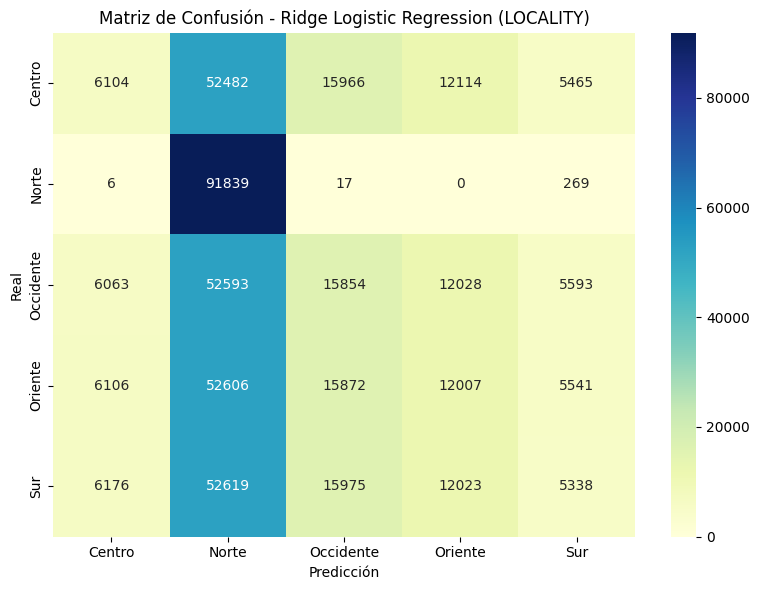

In [50]:
# === Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='YlGnBu')
plt.title("Matriz de Confusión - Ridge Logistic Regression (LOCALITY)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


La matriz de confusión refuerza la tendencia observada en el reporte de clasificación: el modelo presenta una fuerte inclinación hacia predecir la clase 'Norte', con más de 91,000 aciertos exactos y miles de instancias de otras clases mal clasificadas como tal. Por ejemplo, de los 92,131 ejemplos reales de la clase 'Centro', más de 52,000 fueron clasificados como 'Norte', evidenciando un sesgo sistemático que compromete la discriminación entre clases. Este patrón de sobrepredicción se replica en las demás clases, con la mayoría de los errores apuntando hacia la clase 'Norte', lo que sugiere que el modelo ha capturado patrones globales comunes en lugar de diferencias sutiles entre localidades.

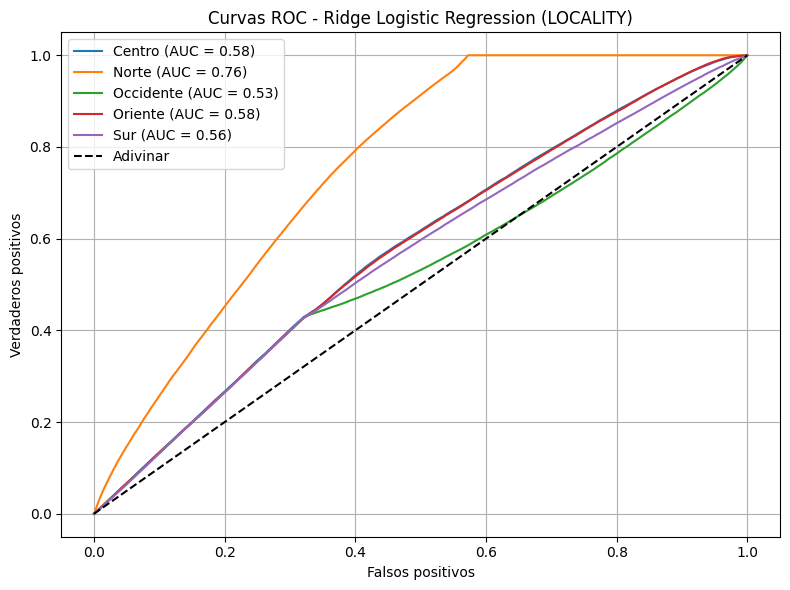

AUC promedio (macro): 0.6008


In [51]:

# === Curvas ROC por clase + AUC por clase ===
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - Ridge Logistic Regression (LOCALITY)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# === AUC promedio (macro) ===
auc_macro = np.mean(auc_scores)
print(f"AUC promedio (macro): {auc_macro:.4f}")

Las curvas ROC por clase permiten observar la capacidad del modelo para separar correctamente los ejemplos positivos de negativos en un marco binario por clase. En este caso, solo la clase 'Norte' alcanza un AUC aceptable (0.76), lo que indica una buena capacidad de discriminación para esa localidad en particular. Las demás clases presentan AUCs significativamente más bajos: entre 0.53 y 0.58, lo que es apenas superior a la línea base de azar (0.5). El AUC macro promedio de 0.6008 refleja esta desigualdad, indicando que, en promedio, el modelo tiene una capacidad de clasificación pobre o marginal para distinguir correctamente entre todas las clases.

Todos estos resultados muestran que el modelo Ridge no optimizado tiene un comportamiento desbalanceado y poco robusto, que favorece en exceso una clase dominante y falla al capturar las particularidades meteorológicas que distinguen entre zonas de la ciudad. Aunque el valor de AUC macro puede parecer moderadamente aceptable, la matriz de confusión y las métricas por clase demuestran que el modelo no es confiable para una clasificación multiclase equitativa.

### **Lasso**

La regresión Lasso se implementa como una regresión logística con penalización L1, la cual tiene como objetivo inducir **sparsity** en los coeficientes del modelo, es decir, forzar que algunos pesos se vuelvan exactamente cero. Esto actúa como un mecanismo de selección automática de variables, útil cuando se sospecha que algunas variables pueden ser irrelevantes o redundantes. En el contexto del presente proyecto, esta propiedad es valiosa para evaluar qué combinaciones de condiciones meteorológicas tienen un mayor poder discriminativo sobre la variable ``LOCALITY``, especialmente en un entorno con múltiples predictores correlacionados.



In [42]:


# === Codificar variable objetivo: LOCALITY ===
le = LabelEncoder()
df['LOCALITY_encoded'] = le.fit_transform(df['LOCALITY'])

# === Seleccionar variables de entrada (X) ===
features = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M',
            'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF',
            'T2MDEW', 'T2MWET', 'WS50M', 'SolarIndex']

# === Usar todo el dataset completo ===
X = df[features]
y = df['LOCALITY_encoded']

# === 3. Tomar muestra del dataset (sin modificar df) ===
#df_sampled = df.sample(n=150000, random_state=42)
#X = df_sampled[features]
#y = df_sampled['LOCALITY_encoded']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Escalar ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Definir modelo: Lasso (L1) ===
lasso = LogisticRegression(
    penalty='l1',        
    solver='saga',       
    max_iter=3000,
     tol=1e-2,       
    n_jobs=-1,           
    random_state=42
)


# === Validación cruzada (accuracy) ===
cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento final y predicción ===
start_time = time.time()

lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
y_proba = lasso.predict_proba(X_test_scaled)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (Lasso): {elapsed_time:.4f} segundos")

# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Cross-validation scores: [0.28480321 0.28377517 0.28435199 0.28445565 0.28603725]
Promedio de accuracy en CV: 0.284684653880163
Tiempo de cómputo (Lasso): 90.6186 segundos
=== Classification Report ===
              precision    recall  f1-score   support

      Centro       0.25      0.07      0.11     92131
       Norte       0.30      1.00      0.47     92131
   Occidente       0.25      0.18      0.21     92131
     Oriente       0.25      0.13      0.17     92132
         Sur       0.24      0.06      0.09     92131

    accuracy                           0.28    460656
   macro avg       0.26      0.28      0.21    460656
weighted avg       0.26      0.28      0.21    460656



El modelo Lasso fue evaluado con validación cruzada de cinco pliegues, obteniendo un promedio de accuracy de 0.2847, prácticamente idéntico al obtenido con Ridge, lo que sugiere que la penalización L1 no generó una mejora significativa en términos de desempeño general. En el conjunto de prueba, el modelo alcanzó una accuracy de 0.28, lo que indica un rendimiento bajo para un problema de clasificación con cinco clases, donde el mínimo esperado por azar sería del 20 %.

Al igual que en el modelo Ridge, la clase 'Norte' fue la única bien reconocida, con un recall de 1.00 y un f1-score de 0.47, mientras que las demás localidades obtuvieron valores de recall muy bajos, entre 0.06 y 0.18, con f1-scores cercanos a 0.10. Esta fuerte asimetría revela que el modelo tiende a concentrar la predicción en una sola clase, incurriendo en una alta tasa de falsos positivos para el resto. Las métricas macro-promediadas (recall macro de 0.28 y f1-score macro de 0.21) reflejan esta falta de balance, indicando que el modelo es incapaz de ofrecer una clasificación equitativa entre todas las localidades.

En términos computacionales, el tiempo de entrenamiento del modelo fue considerablemente mayor (90.6 segundos) en comparación con Ridge, debido a la naturaleza más compleja de la optimización L1, especialmente en problemas multiclase con gran volumen de datos. A pesar de esto, la penalización L1 no logró mejorar la capacidad predictiva ni la discriminación entre clases. El modelo tiende a comportarse de manera muy similar al Ridge, con diferencias marginales y un patrón de error prácticamente idéntico. Esto sugiere que, sin un ajuste fino de hiperparámetros o un proceso explícito de selección de variables, la penalización L1 no aporta ventajas claras en este caso.

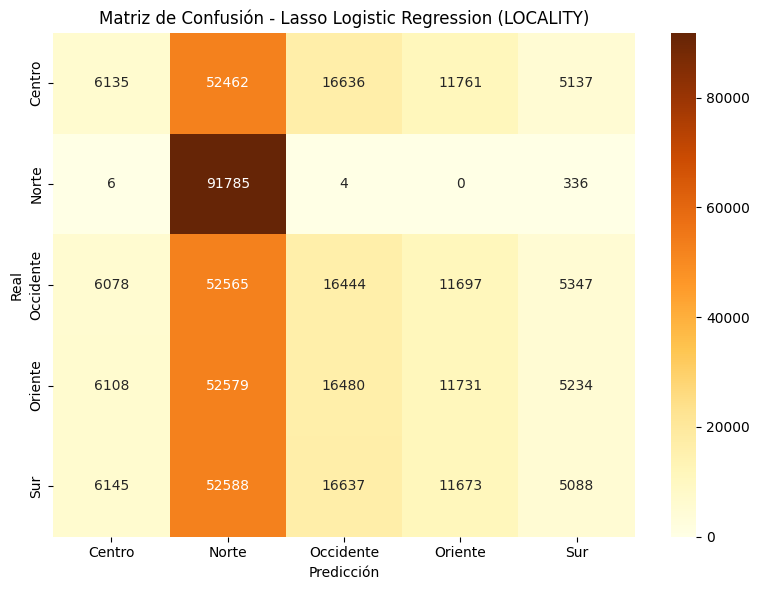

In [44]:

# === Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='YlOrBr')
plt.title("Matriz de Confusión - Lasso Logistic Regression (LOCALITY)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


La matriz de confusión evidencia nuevamente una fuerte inclinación del modelo a clasificar incorrectamente la mayoría de las muestras como pertenecientes a la clase 'Norte', reproduciendo el mismo patrón observado en el modelo Ridge. Por ejemplo, de los 92,131 ejemplos reales de la clase 'Centro', solo 6,135 fueron clasificados correctamente, mientras que más de 52,000 fueron erróneamente asignados a 'Norte'. Esta tendencia se repite para las demás clases, lo cual revela una falta de sensibilidad generalizada del modelo para diferenciar entre las localidades, salvo por 'Norte'.

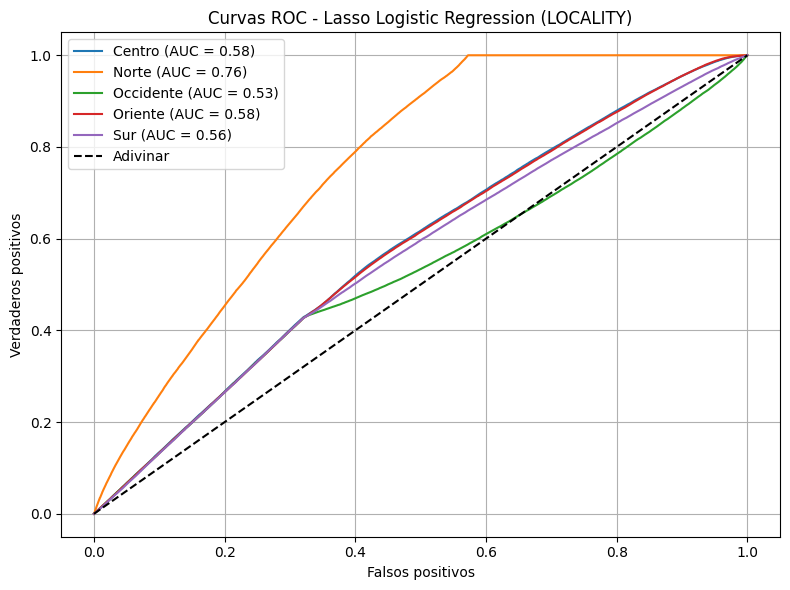

AUC promedio (macro): 0.6007


In [45]:

# === Curvas ROC por clase + AUC por clase ===
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - Lasso Logistic Regression (LOCALITY)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# === AUC promedio (macro) ===
auc_macro = np.mean(auc_scores)
print(f"AUC promedio (macro): {auc_macro:.4f}")


Analizando las curvas ROC se observa que el modelo discrimina relativamente bien la clase 'Norte', con un **AUC de 0.76**, mientras que las otras clases presentan valores cercanos a 0.5. En particular, las curvas correspondientes a 'Occidente' y 'Sur' muestran un comportamiento casi aleatorio, con AUC's de 0.53 y 0.56 respectivamente. La clase 'Centro' y 'Oriente' se sitúan en un punto intermedio, con un AUC de 0.58 cada una. Este comportamiento se resume en un AUC promedio (macro) de 0.6007, lo cual indica que, en promedio, el modelo tiene una capacidad de discriminación débil, apenas por encima del azar (QUE ES 0.5). Como conclusión para este modelo se llegó a que los resultados sugieren que la penalización L1 no contribuyó a una mejora significativa del rendimiento. La matriz de confusión confirma que la mayor parte de las predicciones recaen en una única clase, y las curvas ROC reflejan una baja capacidad del modelo para separar correctamente instancias positivas de negativas en la mayoría de las clases. Si bien el modelo fue computacionalmente más costoso que Ridge, su comportamiento es esencialmente el mismo, con diferencias mínimas en las métricas y en el patrón de error.

### **Random Forest**

Random Forest es un modelo de clasificación basado en un conjunto de árboles de decisión entrenados sobre subconjuntos aleatorios del conjunto de datos. Cada árbol contribuye con un voto, y la clase final se decide por mayoría. Esta técnica es conocida por su robustez ante el sobreajuste y su capacidad para modelar relaciones no lineales. En este proyecto, se utiliza como modelo de referencia para evaluar su rendimiento en la clasificación de ``LOCALITY``, a partir de variables meteorológicas, sin ajuste de hiperparámetros.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

features = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M',
            'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF',
            'T2MDEW', 'T2MWET', 'WS50M', 'SolarIndex']

# === Usar todo el dataset completo ===
X = df[features]
y = df['LOCALITY_encoded']

# === Datos: X e y vienen de df_sampled ya tratado ===
#df_sampled = df.sample(n=150000, random_state=42)
#X = df_sampled[features]
#y = df_sampled['LOCALITY_encoded']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)



# === Definir modelo Random Forest (no optimizado) ===
rf = RandomForestClassifier(random_state=42)

# === Validación cruzada ===
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento y predicción (con tiempo) ===
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (Random Forest benchmark): {elapsed_time:.4f} segundos")

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Cross-validation scores: [0.16825834 0.1684165  0.16794202 0.16675195 0.16791489]
Promedio de accuracy en CV: 0.16785673983880797
Tiempo de cómputo (Random Forest benchmark): 355.7430 segundos
=== Classification Report ===
              precision    recall  f1-score   support

      Centro       0.08      0.08      0.08     92131
       Norte       0.32      0.58      0.41     92131
   Occidente       0.05      0.03      0.04     92131
     Oriente       0.09      0.08      0.08     92132
         Sur       0.04      0.03      0.03     92131

    accuracy                           0.16    460656
   macro avg       0.12      0.16      0.13    460656
weighted avg       0.12      0.16      0.13    460656



El modelo Random Forest, arrojó un promedio de accuracy en validación cruzada de apenas 0.1678, el valor más bajo entre todos los modelos evaluados hasta el momento. Esta tendencia se mantuvo en el conjunto de prueba, con una exactitud global de 16 %, lo cual indica un desempeño deficiente incluso frente a una clasificación aleatoria. Esto sugiere que la configuración por defecto del modelo no está adaptada a la complejidad del problema, ni logra capturar patrones relevantes en los datos meteorológicos para distinguir entre localidades. El análisis por clase muestra que solo la clase 'Norte' fue reconocida con cierto nivel de acierto, alcanzando un recall de 0.58 y un f1-score de 0.41, mientras que el resto de las clases presenta recalls extremadamente bajos (entre 0.03 y 0.08), con f1-scores que no superan 0.08. Las métricas macro-promediadas (recall de 0.16 y f1-score de 0.13) reflejan una clara incapacidad del modelo para ofrecer una clasificación balanceada entre todas las clases. La métrica weighted avg, que pondera el soporte de cada clase, tampoco mejora significativamente.

En términos computacionales, el modelo fue notablemente más costoso que los anteriores, con un tiempo de entrenamiento superior a 355 segundos. Sin embargo, este mayor esfuerzo no se tradujo en un mejor desempeño. Por el contrario, la falta de ajuste en los hiperparámetros clave (como el número de árboles, su profundidad, o los criterios de división) probablemente limitó la capacidad del modelo para aprender representaciones útiles del fenómeno observado.

Con estos resultados notamos que el modelo Random Forest sin optimización resulta inadecuado para este problema específico, y sugiere la necesidad de un ajuste cuidadoso de hiperparámetros para poder aprovechar el potencial de este tipo de algoritmo.

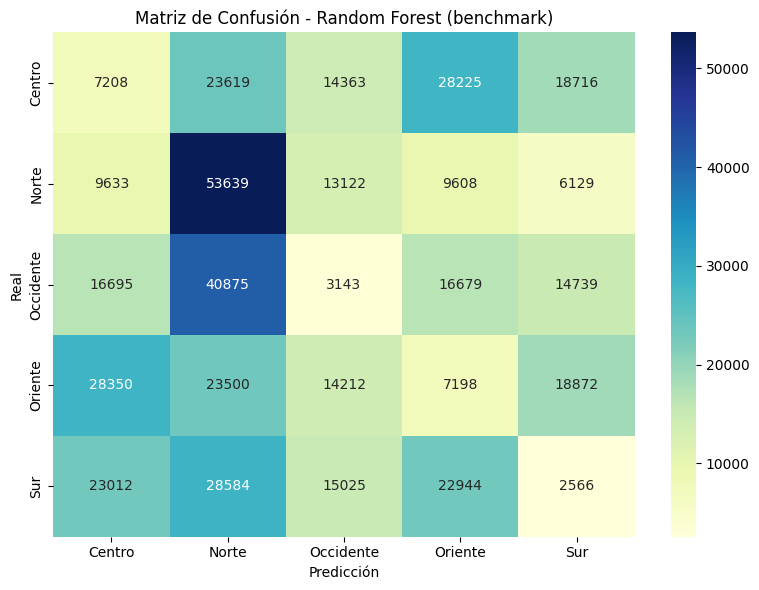

In [47]:

# === Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión - Random Forest (benchmark)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


La matriz de confusión revela un patrón de error disperso y poco estructurado. Aunque la clase 'Norte' sigue siendo la que presenta mayor cantidad de aciertos (53,639 casos correctamente clasificados), su desempeño está lejos del recall perfecto que mostraban los modelos Ridge y Lasso. Además, una proporción significativa de las instancias de 'Norte' se distribuyen erróneamente entre las demás clases, particularmente hacia 'Centro' y 'Occidente'.

Las demás clases muestran una distribución de errores aún más crítica. Por ejemplo, la clase 'Oriente' tiene una alta cantidad de instancias mal clasificadas como 'Centro' (28,350) y como 'Norte' (23,500), mientras que sus aciertos apenas alcanzan los 7,198. La clase 'Sur' presenta un comportamiento similar, con más predicciones incorrectas hacia 'Norte' (28,584) y 'Centro' (23,012) que aciertos reales (2,566). Este patrón se repite también en las filas de 'Centro' y 'Occidente', lo que indica que el modelo tiene dificultades para generar reglas consistentes que permitan distinguir de forma confiable entre localidades. No obnstante, la matriz refleja un modelo que comete errores generalizados, sin un sesgo claro hacia una sola clase como en modelos anteriores, pero con un alto grado de confusión cruzada entre todas las etiquetas, lo que se traduce en un desempeño pobre y desbalanceado.

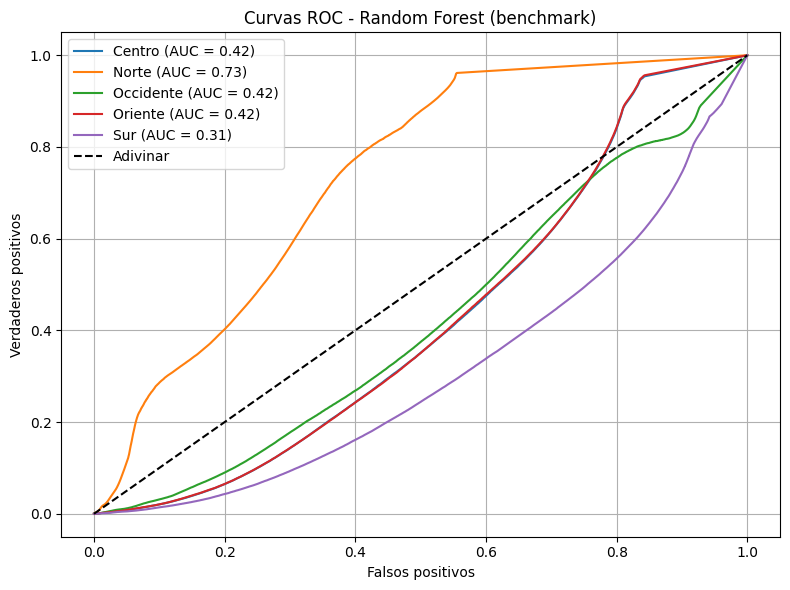

AUC promedio (macro): 0.4625


In [48]:

# === Curvas ROC y AUC ===
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - Random Forest (benchmark)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# === AUC promedio (macro) ===
auc_macro = np.mean(auc_scores)
print(f"AUC promedio (macro): {auc_macro:.4f}")


Las curvas ROC para el modelo Random Forest reflejan una baja capacidad de discriminación entre clases. Solo la clase 'Norte' alcanza un valor aceptable de AUC (0.73), mientras que el resto de las clases se encuentran muy cerca o por debajo del umbral del azar. En particular, las curvas correspondientes a 'Centro', 'Occidente' y 'Oriente' muestran valores de 0.42, lo que indica que el modelo apenas mejora sobre una clasificación aleatoria. El caso de la clase 'Sur' es especialmente crítico, con un AUC de apenas 0.31, lo que sugiere que el modelo realiza más clasificaciones incorrectas que correctas para esa categoría.

El AUC promedio (macro) de 0.4625 confirma esta tendencia general de bajo rendimiento. Este valor representa el promedio de la capacidad del modelo para separar correctamente cada clase frente a las demás, y en este caso es inferior al 0.5, que marca el umbral de un modelo sin capacidad predictiva. La gran diferencia entre la clase mejor reconocida ('Norte') y las demás refleja un desequilibrio severo en la capacidad del modelo para aprender representaciones útiles para cada localidad.

### **XGBoost**

XGBoost es un modelo de boosting basado en árboles de decisión que construye secuencias de modelos débiles corrigiendo iterativamente los errores del anterior. Es reconocido por su capacidad de generalización, velocidad de entrenamiento y manejo eficiente de grandes volúmenes de datos. En este caso, se utilizó con su configuración base como modelo benchmark, para evaluar su rendimiento inicial sin ajustes sobre el conjunto de variables meteorológicas empleadas para predecir ``LOCALITY``.

In [ ]:
from xgboost import XGBClassifier

# === Separar features y target) ===
X = df[features]
y = df['LOCALITY_encoded']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Definir modelo XGBoost (no optimizado) ===
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# === Validación cruzada (accuracy) ===
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento y predicción (con tiempo) ===
start_time = time.time()
xgb.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (XGBoost benchmark): {elapsed_time:.4f} segundos")

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)

# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Cross-validation scores: [0.28659878 0.28635689 0.28590567 0.28596747 0.28669315]
Promedio de accuracy en CV: 0.2863043941896197
Tiempo de cómputo (XGBoost benchmark): 11.2518 segundos
=== Classification Report ===
              precision    recall  f1-score   support

      Centro       0.21      0.19      0.20     92131
       Norte       0.36      0.87      0.51     92131
   Occidente       0.18      0.08      0.11     92131
     Oriente       0.21      0.18      0.19     92132
         Sur       0.17      0.07      0.10     92131

    accuracy                           0.28    460656
   macro avg       0.23      0.28      0.22    460656
weighted avg       0.23      0.28      0.22    460656



El modelo alcanzó un promedio de accuracy en validación cruzada de 0.2863, valor que se mantuvo prácticamente igual en el conjunto de prueba (accuracy total de 28 %). A pesar de tratarse de una configuración básica, este rendimiento ya supera el de varios modelos evaluados, lo que sugiere que incluso sin optimización, XGBoost logra captar algunas estructuras relevantes en los datos.

Sin embargo, el modelo también muestra un comportamiento desequilibrado. La clase 'Norte' vuelve a ser la más favorecida, con un recall de 0.87 y un f1-score de 0.51, mientras que las demás localidades presentan valores considerablemente más bajos. En particular, 'Occidente' y 'Sur' son las clases con menor desempeño, ambas con recalls inferiores al 0.10 y f1-scores cercanos a 0.10. Las métricas macro-promediadas (recall de 0.28 y f1-score de 0.22) confirman que, aunque el modelo mejora el reconocimiento de una clase dominante, sigue teniendo dificultades para distinguir correctamente entre todas las categorías.

En términos de eficiencia, el modelo completó el entrenamiento en apenas 11.25 segundos, lo que demuestra su buena relación entre costo computacional y rendimiento inicial. Esto lo posiciona como un modelo con potencial para ser optimizado, especialmente considerando que ya muestra señales de diferenciación entre clases sin ajustes previos.

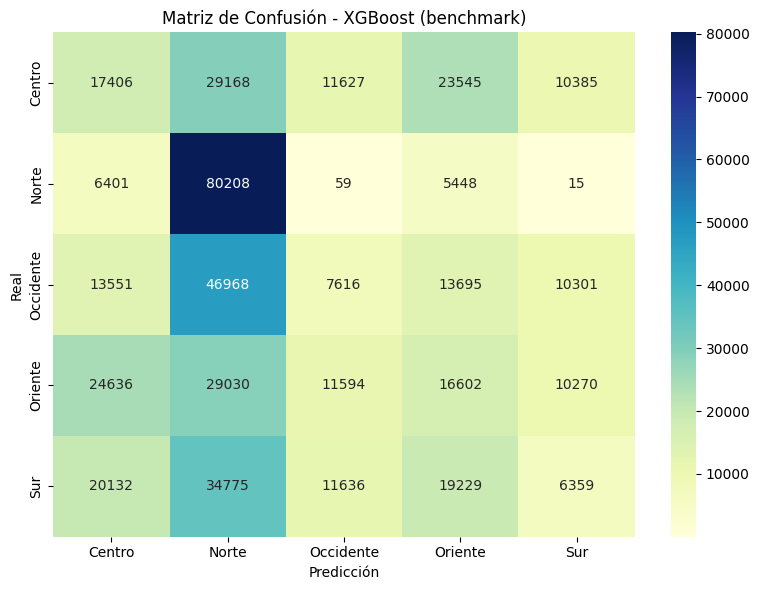

In [52]:

# === Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cmap='YlGnBu')
plt.title("Matriz de Confusión - XGBoost (benchmark)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


La matriz de confusión muestra que el modelo logra un buen reconocimiento de la clase 'Norte', con 80,208 predicciones correctas, pero sigue clasificando erróneamente una cantidad considerable de instancias de otras clases como si fueran 'Norte'. Por ejemplo, más de 34,000 observaciones reales de 'Sur' fueron clasificadas como 'Norte', lo que refleja un sesgo hacia esa clase.

En las demás categorías, el modelo distribuye los errores de manera más equilibrada que modelos anteriores, aunque con bajo nivel de aciertos. La clase 'Centro' tuvo alrededor de 17,000 predicciones correctas, pero otras 23,000 fueron confundidas con 'Oriente'. El resto de las clases sigue con niveles altos de confusión cruzada, especialmente 'Occidente' y 'Oriente', lo que indica que el modelo aún tiene dificultades para separar bien estas zonas.

Si bien no alcanza un rendimiento balanceado, la matriz sugiere que el modelo comienza a capturar algunas diferencias entre clases, y que con ajustes podría mejorar su precisión y reducir la confusión entre localidades.

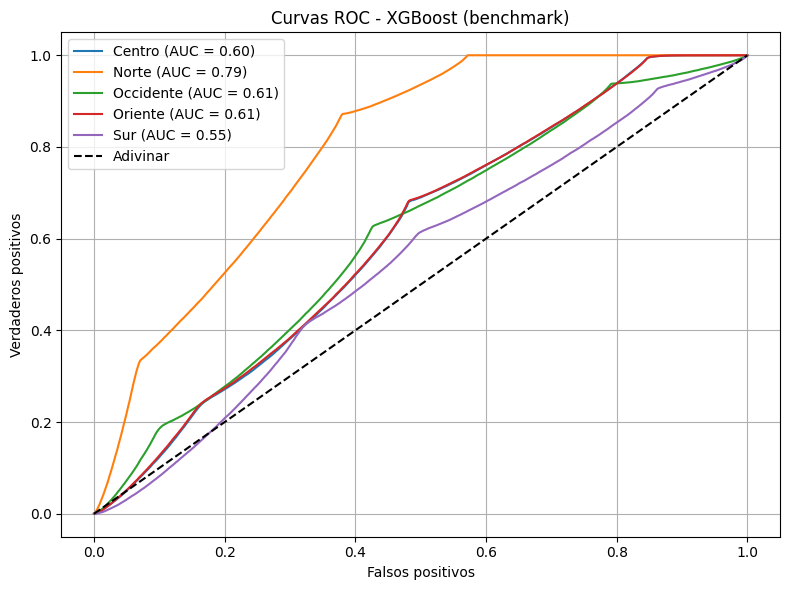

In [53]:

# === Curvas ROC y AUC por clase ===
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - XGBoost (benchmark)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [54]:

# === AUC promedio (macro) ===
auc_macro = np.mean(auc_scores)
print(f"AUC promedio (macro): {auc_macro:.4f}")


AUC promedio (macro): 0.6318


Las curvas ROC muestran una mejora general en la capacidad del modelo para distinguir entre clases, especialmente en comparación con los modelos anteriores. La clase 'Norte' se destaca nuevamente con un AUC de 0.79, lo que indica que el modelo logra identificar correctamente la mayoría de sus casos. Las demás clases alcanzan valores más moderados, entre 0.55 ('Sur') y 0.61 ('Occidente', 'Oriente'), lo cual representa un progreso respecto a lo observado con modelos anteriores.

El AUC promedio (macro) fue de 0.6318, lo que sugiere que el modelo tiene una capacidad global aceptable para separar clases en un contexto multiclase, aunque todavía limitada en varias categorías. Si bien no hay un balance perfecto, el modelo demuestra un avance en la diferenciación de localidades, y esta base inicial justifica una posterior optimización para aprovechar mejor su potencial.

### **SVM (Support Vector Machine)**

Support Vector Machine (SVM) es un modelo supervisado que busca encontrar el hiperplano óptimo que maximiza la separación entre clases. Su principal ventaja es que puede modelar relaciones complejas incluso en espacios de alta dimensión, especialmente con el uso de kernels. En este caso, se utilizó un modelo SVM con su configuración básica y sin optimización, para evaluar su rendimiento inicial sobre el conjunto reducido de datos meteorológicos y la clasificación de ``LOCALITY``.

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# === Tomar muestra del dataset completo ===
df_sampled = df.sample(n=75000, random_state=42)

# === Separar features y target ===
X = df_sampled[features]
y = df_sampled['LOCALITY_encoded']

# === Separar features y target (dataset completo) ===
#X = df[features]
#y = df['LOCALITY_encoded']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Escalado obligatorio para SVM ===
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Definir SVM (benchmark) ===
svm = SVC(probability=True, random_state=42)

# === Validación cruzada ===
cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento y predicción (con tiempo) ===
start_time = time.time()
svm.fit(X_train_scaled, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (SVM benchmark): {elapsed_time:.4f} segundos")

y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)

# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Cross-validation scores: [0.28742857 0.28438095 0.29       0.28485714 0.28504762]
Promedio de accuracy en CV: 0.2863428571428571
Tiempo de cómputo (SVM benchmark): 560.4205 segundos
=== Classification Report ===
              precision    recall  f1-score   support

      Centro       0.25      0.08      0.13      4465
       Norte       0.31      1.00      0.47      4536
   Occidente       0.25      0.09      0.13      4513
     Oriente       0.26      0.15      0.19      4473
         Sur       0.24      0.10      0.14      4513

    accuracy                           0.29     22500
   macro avg       0.26      0.29      0.21     22500
weighted avg       0.26      0.29      0.21     22500



El modelo obtuvo un promedio de accuracy en validación cruzada de 0.2863, valor consistente con el resultado en el conjunto de prueba (exactitud del 29 %), lo que lo posiciona levemente por encima del rendimiento base observado en modelos anteriores. Sin embargo, al igual que otros clasificadores, SVM presenta un comportamiento fuertemente sesgado hacia la clase 'Norte', con un recall perfecto de 1.00 y un f1-score de 0.47. Este patrón implica que el modelo tiende a clasificar gran parte de las observaciones en esa categoría, lo que afecta la capacidad de distinguir correctamente el resto de las clases.

El desempeño en las demás localidades es bajo, con recalls que oscilan entre 0.08 ('Centro') y 0.15 ('Oriente'), y f1-scores que no superan 0.19. Las métricas macro-promediadas (recall de 0.29 y f1-score de 0.21) indican que, si bien hay un ligero avance frente a modelos como Ridge o Lasso, el rendimiento sigue siendo limitado y desigual.

Un aspecto importante es el tiempo de cómputo, que fue considerablemente mayor (560 segundos), lo que resalta uno de los principales inconvenientes del SVM tradicional en conjuntos de datos de tamaño medio o grande. Aunque ofrece una mejora marginal en precisión global, su costo computacional y su tendencia a sobreajustar una sola clase limitan su utilidad práctica en este escenario sin ajustes adicionales.

Cabe resaltar que este modelo no fue entrenado con el conjunto completo de datos (1.5 millones de registros aprox), sino con una muestra de 75,000 instancias. Esto se debió a las limitaciones de tiempo de cómputo, ya que el algoritmo SVM, en su forma clásica, no escala bien con grandes volúmenes de datos. Esta restricción debe tenerse en cuenta al comparar los resultados con otros modelos que sí fueron ejecutados sobre la totalidad del dataset.

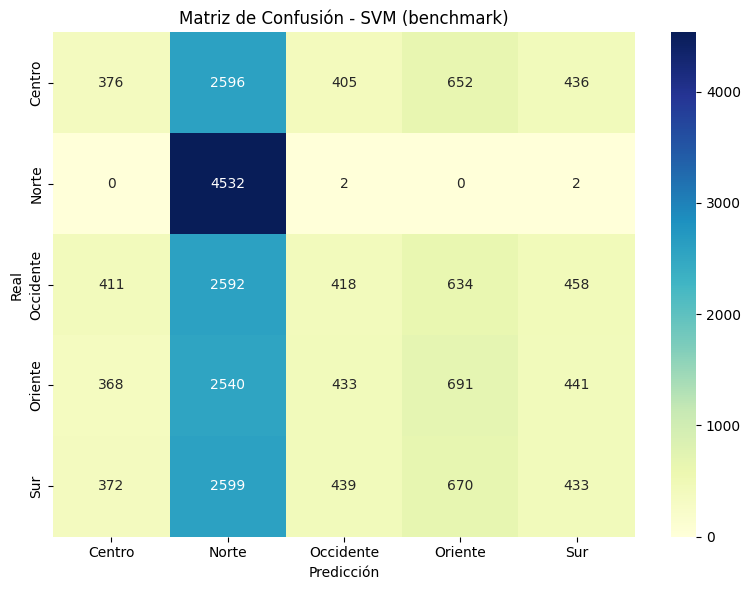

In [8]:

# === Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cmap='YlGnBu')
plt.title("Matriz de Confusión - SVM (benchmark)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


La matriz muestra una alta concentración de predicciones en la clase 'Norte', con 4,532 aciertos, lo que explica el recall perfecto observado en el reporte. Sin embargo, el resto de las clases se ven fuertemente afectadas por esto. Por ejemplo, la mayoría de los ejemplos reales de 'Centro', 'Occidente', 'Oriente' y 'Sur' fueron mal clasificados como 'Norte'. En el caso de 'Centro', solo 376 instancias fueron correctamente clasificadas, mientras más de 2,500 se asignaron erróneamente a 'Norte'.

Este patrón se repite con todas las clases no dominantes, que presentan pocas predicciones correctas y una distribución de errores bastante similar, lo que indica que el modelo no logra separar adecuadamente las clases más allá de 'Norte'. Aunque el número total de errores es bajo en comparación con modelos que usaron más datos, la falta de balance entre clases resalta las limitaciones de SVM en esta configuración inicial.

El resultado reafirma que, si bien el modelo acierta con precisión en una clase muy representada, su generalización hacia el resto de las etiquetas es muy pobre, con alta confusión entre todas las demás.

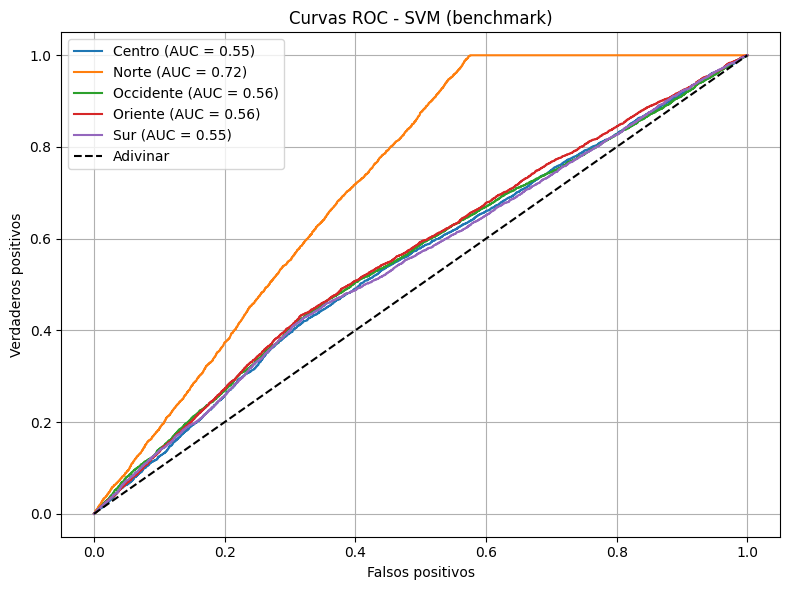

AUC promedio (macro): 0.5886


In [9]:

# === Curvas ROC y AUC por clase ===
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - SVM (benchmark)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# === AUC promedio (macro) ===
auc_macro = np.mean(auc_scores)
print(f"AUC promedio (macro): {auc_macro:.4f}")


Las curvas ROC muestran que el modelo tiene un desempeño claramente favorable solo en la clase 'Norte', con un AUC de 0.72, mientras que para el resto de las clases los valores se ubican apenas por encima del azar, entre 0.55 y 0.56. La clase 'Centro', por ejemplo, presenta un AUC de 0.55, lo que indica que el modelo apenas logra distinguir correctamente entre positivos y negativos para esa categoría. La falta de separación entre curvas evidencia una capacidad limitada para discriminar correctamente entre la mayoría de las clases.

El AUC promedio (macro) fue de 0.5886, lo cual confirma una leve capacidad de discriminación global del modelo, pero sin resultados satisfactorios en términos de balance o equidad entre etiquetas. Este comportamiento está alineado con lo observado en la matriz de confusión y el reporte de métricas.

## **Implementación de los modelos (con optimización)**

### **Optimización de KNN con KD-Trees, Ball Trees, FAISS**

#### **KD-Tree**

In [15]:
# === Definir modelo KNN con KD-Tree ===
knn_kdtree = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

# === Validación cruzada ===
cv_scores_kdtree = cross_val_score(knn_kdtree, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores (KD-Tree):", cv_scores_kdtree)
print("Promedio de accuracy en CV (KD-Tree):", cv_scores_kdtree.mean())

# === Entrenamiento final y predicción (medimos tiempo) ===
start_time = time.time()

knn_kdtree.fit(X_train_scaled, y_train)
y_pred_kdtree = knn_kdtree.predict(X_test_scaled)
y_proba_kdtree = knn_kdtree.predict_proba(X_test_scaled)

end_time = time.time()
elapsed_time_kdtree = end_time - start_time

print(f"Tiempo de cómputo (KNN con KD-Tree): {elapsed_time_kdtree:.4f} segundos")

# === Reporte de clasificación ===
print("=== Classification Report (KD-Tree) ===")
print(classification_report(y_test, y_pred_kdtree, target_names=le.classes_))


Cross-validation scores (KD-Tree): [0.22099519 0.2218139  0.22179995 0.22197309 0.22196379]
Promedio de accuracy en CV (KD-Tree): 0.22170918574600978
Tiempo de cómputo (KNN con KD-Tree): 20.4023 segundos
=== Classification Report (KD-Tree) ===
              precision    recall  f1-score   support

      Centro       0.19      0.34      0.24     92131
       Norte       0.34      0.48      0.40     92131
   Occidente       0.16      0.16      0.16     92131
     Oriente       0.18      0.11      0.14     92132
         Sur       0.10      0.01      0.03     92131

    accuracy                           0.22    460656
   macro avg       0.19      0.22      0.19    460656
weighted avg       0.19      0.22      0.19    460656



#### **Ball Trees**

In [55]:

# === Definir modelo KNN con Ball-Tree ===
knn_balltree = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')

# === Validación cruzada ===
cv_scores_balltree = cross_val_score(knn_balltree, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores (Ball-Tree):", cv_scores_balltree)
print("Promedio de accuracy en CV (Ball-Tree):", cv_scores_balltree.mean())

# === Entrenamiento final y predicción (medimos tiempo) ===
start_time = time.time()

knn_balltree.fit(X_train_scaled, y_train)
y_pred_balltree = knn_balltree.predict(X_test_scaled)
y_proba_balltree = knn_balltree.predict_proba(X_test_scaled)

end_time = time.time()
elapsed_time_balltree = end_time - start_time

print(f"Tiempo de cómputo (KNN con Ball-Tree): {elapsed_time_balltree:.4f} segundos")

# === Reporte de clasificación ===
print("=== Classification Report (Ball-Tree) ===")
print(classification_report(y_test, y_pred_balltree, target_names=le.classes_))  


Cross-validation scores (Ball-Tree): [0.22099519 0.22180925 0.2218046  0.22196844 0.2219824 ]
Promedio de accuracy en CV (Ball-Tree): 0.22171197680717122
Tiempo de cómputo (KNN con Ball-Tree): 1216.6085 segundos
=== Classification Report (Ball-Tree) ===
              precision    recall  f1-score   support

      Centro       0.19      0.34      0.24     92131
       Norte       0.34      0.48      0.40     92131
   Occidente       0.16      0.16      0.16     92131
     Oriente       0.18      0.11      0.14     92132
         Sur       0.10      0.01      0.03     92131

    accuracy                           0.22    460656
   macro avg       0.19      0.22      0.19    460656
weighted avg       0.19      0.22      0.19    460656



In [ ]:
#Aplicando el algoritmo de optimización sin hacer la validación cruzada
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report, accuracy_score

# === Modelo con Ball-Tree ===
knn_balltree = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')

start = time.time()
knn_balltree.fit(X_train_scaled, y_train)
y_pred_balltree = knn_balltree.predict(X_test_scaled)
end = time.time()

elapsed_time_balltree = end - start
print(f"Tiempo de cómputo (Ball-Tree): {elapsed_time_balltree:.4f} segundos")
print(f"Accuracy (Ball-Tree): {accuracy_score(y_test, y_pred_balltree):.4f}")

print("=== Classification Report (Ball-Tree) ===")
print(classification_report(y_test, y_pred_balltree, target_names=le.classes_))


#### **FAISS**

In [17]:
import faiss
import numpy as np
import time
from sklearn.metrics import accuracy_score, classification_report

# === Preparar datos para FAISS ===
X_train_faiss = np.ascontiguousarray(X_train_scaled.astype('float32'))
X_test_faiss = np.ascontiguousarray(X_test_scaled.astype('float32'))
y_train_array = np.array(y_train)

# === Crear índice FAISS ===
index = faiss.IndexFlatL2(X_train_faiss.shape[1])  # distancia euclidiana
index.add(X_train_faiss)

# === Buscar vecinos más cercanos con tiempo de cómputo ===
k = 2  # igual que el mejor k de KNN
start_time = time.time()
distances, indices = index.search(X_test_faiss, k)
end_time = time.time()

elapsed_time_faiss = end_time - start_time
print(f"Tiempo de cómputo (KNN con FAISS): {elapsed_time_faiss:.4f} segundos")

# === Predicción: clase más frecuente entre vecinos ===
y_pred_faiss = []

for idx_list in indices:
    vecinos = y_train_array[idx_list]
    pred_clase = np.bincount(vecinos).argmax()  # clase más común
    y_pred_faiss.append(pred_clase)

# === Evaluación ===
acc_faiss = accuracy_score(y_test, y_pred_faiss)
print(f"Accuracy con FAISS: {acc_faiss:.4f}")

print("=== Classification Report (FAISS) ===")
print(classification_report(y_test, y_pred_faiss, target_names=le.classes_))  


Tiempo de cómputo (KNN con FAISS): 243.8416 segundos
Accuracy con FAISS: 0.2202
=== Classification Report (FAISS) ===
              precision    recall  f1-score   support

      Centro       0.19      0.34      0.24     92131
       Norte       0.34      0.48      0.40     92131
   Occidente       0.16      0.16      0.16     92131
     Oriente       0.17      0.11      0.14     92132
         Sur       0.10      0.01      0.03     92131

    accuracy                           0.22    460656
   macro avg       0.19      0.22      0.19    460656
weighted avg       0.19      0.22      0.19    460656



Aunque FAISS es ampliamente reconocido por su eficiencia en búsquedas de vecinos en grandes volúmenes de datos, en este caso específico el uso de FAISS no redujo el tiempo de cómputo en comparación con el modelo KNN estándar. De hecho, el tiempo total fue significativamente mayor (243 segundos vs. 22 segundos (aprox)) debido a que se utilizó un índice exacto (IndexFlatL2) sin aprovechamiento de aceleración por GPU o aproximación. Esto nos ha resultado que, para datasets de tamaño moderado como el nuestro, las optimizaciones internas de scikit-learn como KD-Tree resulta más adecuada, aunque la diferencia en tiempo de computo no fue significativamente alta.

### **Optimización de Bayes con Partial_fit**

In [48]:

# --- Entrenamiento por lotes con partial_fit ---
nb_batch_model = GaussianNB()
batch_size = 10000
n_samples = X_train.shape[0]
classes = np.unique(y_train)

start_time = time.time()

for i in range(0, n_samples, batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    
    if i == 0:
        nb_batch_model.partial_fit(X_batch, y_batch, classes=classes)
    else:
        nb_batch_model.partial_fit(X_batch, y_batch)

end_time = time.time()
batch_training_time = end_time - start_time
print(f"Tiempo de entrenamiento con partial_fit(): {batch_training_time:.4f} segundos")

# --- Evaluación ---
y_pred = nb_batch_model.predict(X_test)
y_score = nb_batch_model.predict_proba(X_test)

# === Reporte de clasificación con nombres ===
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Tiempo de entrenamiento con partial_fit(): 0.1582 segundos

Reporte de Clasificación:
              precision    recall  f1-score   support

      Centro       0.25      0.03      0.06     92131
       Norte       0.31      0.99      0.47     92131
   Occidente       0.19      0.02      0.03     92131
     Oriente       0.25      0.28      0.26     92132
         Sur       0.24      0.11      0.15     92131

    accuracy                           0.28    460656
   macro avg       0.25      0.28      0.19    460656
weighted avg       0.25      0.28      0.19    460656



### **Optimización de Ridge con Solver optimizado saga**

Cross-validation scores: [0.28477995 0.28401706 0.28413801 0.28473941 0.28602795]
Promedio de accuracy en CV: 0.2847404750990643
Tiempo de cómputo (Ridge): 390.8309 segundos
=== Classification Report ===
              precision    recall  f1-score   support

      Centro       0.25      0.07      0.11     92131
       Norte       0.30      1.00      0.47     92131
   Occidente       0.25      0.18      0.21     92131
     Oriente       0.25      0.13      0.17     92132
         Sur       0.24      0.06      0.09     92131

    accuracy                           0.28    460656
   macro avg       0.26      0.28      0.21    460656
weighted avg       0.26      0.28      0.21    460656



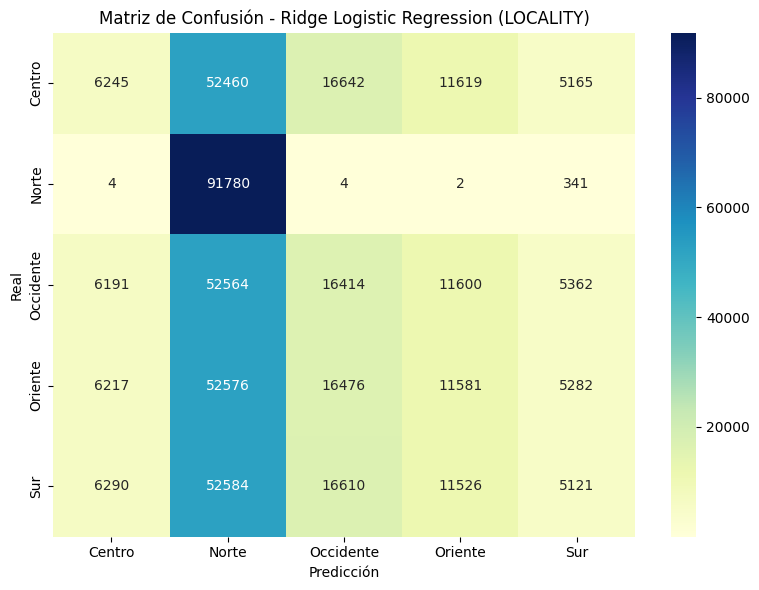

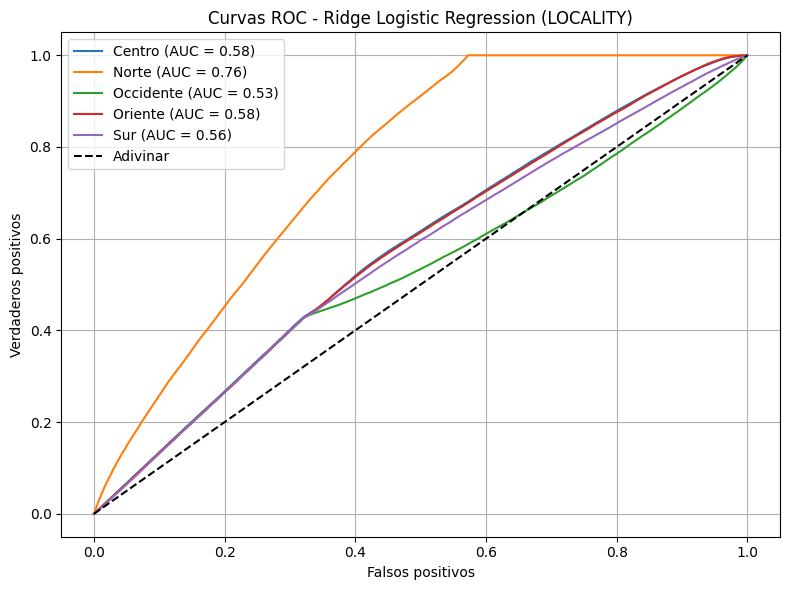

AUC promedio (macro): 0.6005


In [ ]:

from sklearn.linear_model import LogisticRegression


# === Codificar variable objetivo: LOCALITY ===
le = LabelEncoder()
df['LOCALITY_encoded'] = le.fit_transform(df['LOCALITY'])

# === Seleccionar variables de entrada (X) ===
features = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M',
            'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF',
            'T2MDEW', 'T2MWET', 'WS50M', 'SolarIndex']

X = df[features]
y = df['LOCALITY_encoded']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Escalar ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Definir modelo: Ridge (L2) ===
ridge = LogisticRegression(
    penalty='l2',      # Ridge
    solver='saga',     # Elegido automáticamente por sklearn
    max_iter=500,      
    n_jobs=-1,         
    random_state=42
)

# === Validación cruzada (accuracy) ===
cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento final y predicción ===
start_time = time.time()

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
y_proba = ridge.predict_proba(X_test_scaled)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (Ridge): {elapsed_time:.4f} segundos")

# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [ ]:

# === Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='YlGnBu')
plt.title("Matriz de Confusión - Ridge Logistic Regression (LOCALITY)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


In [ ]:

# === Curvas ROC por clase + AUC por clase ===
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - Ridge Logistic Regression (LOCALITY)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# === AUC promedio (macro) ===
auc_macro = np.mean(auc_scores)
print(f"AUC promedio (macro): {auc_macro:.4f}")


### **Optimización de Random Forest con GridSearchCV**

El siguiente código implementa una versión optimizada del modelo Random Forest para la clasificación de la variable LOCALITY, utilizando una búsqueda exhaustiva de hiperparámetros mediante la técnica de GridSearchCV. A diferencia del modelo benchmark, que utiliza los valores por defecto del clasificador, esta versión explora sistemáticamente combinaciones de parámetros críticos como el número de árboles (n_estimators), la profundidad máxima de los árboles (max_depth), el número mínimo de muestras necesarias para dividir un nodo (min_samples_split), y el número mínimo de muestras por hoja (min_samples_leaf). Esta búsqueda se realiza con validación cruzada (cv=3), lo que permite evaluar el rendimiento de cada combinación de hiperparámetros de forma robusta, minimizando el riesgo de sobreajuste.

Una vez identificada la mejor configuración, el modelo resultante es evaluado sobre el conjunto de prueba, calculando métricas como accuracy, recall, precision, F1-score, matriz de confusión y AUC (curvas ROC por clase y macro). Además, se mide el tiempo total de entrenamiento para comparar la eficiencia del modelo optimizado respecto a su contraparte no ajustada. Con esto se busca que esta versión del modelo maximize el desempeño predictivo a través del ajuste sistemático de sus parámetros clave, en lugar de depender de la configuración por defecto

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# === Definir el modelo base ===
rf_base = RandomForestClassifier(random_state=42)

# === Definir la grilla de hiperparámetros ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# === GridSearch con validación cruzada ===
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# === Entrenamiento con tiempo ===
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de entrenamiento con GridSearch: {elapsed_time:.2f} segundos")

# === Mejor modelo ===
best_rf = grid_search.best_estimator_
print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === Evaluación en test ===
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reporte
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tiempo de entrenamiento con GridSearch: 96.89 segundos
Mejor combinación de hiperparámetros:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

      Centro       0.25      0.17      0.20      4465
       Norte       0.37      0.87      0.51      4536
   Occidente       0.24      0.08      0.12      4513
     Oriente       0.26      0.27      0.26      4473
         Sur       0.24      0.14      0.18      4513

    accuracy                           0.31     22500
   macro avg       0.27      0.31      0.26     22500
weighted avg       0.27      0.31      0.26     22500



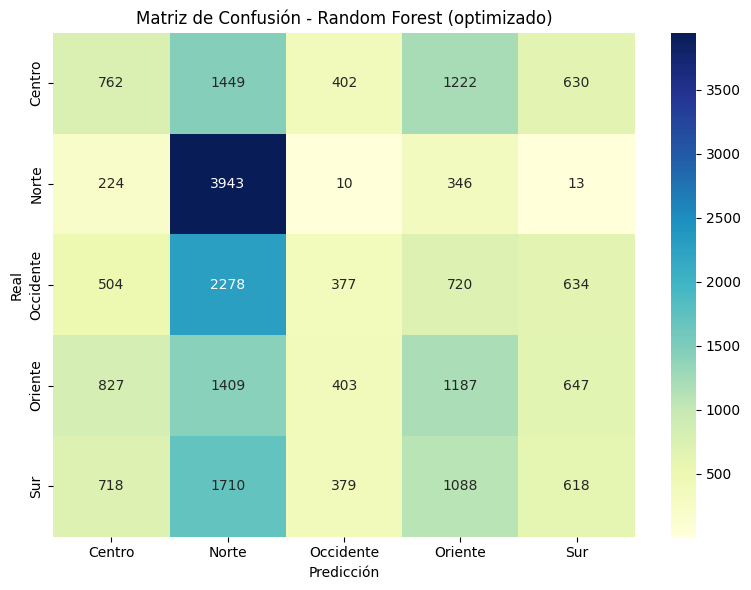

In [11]:

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='YlGnBu')
plt.title("Matriz de Confusión - Random Forest (optimizado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


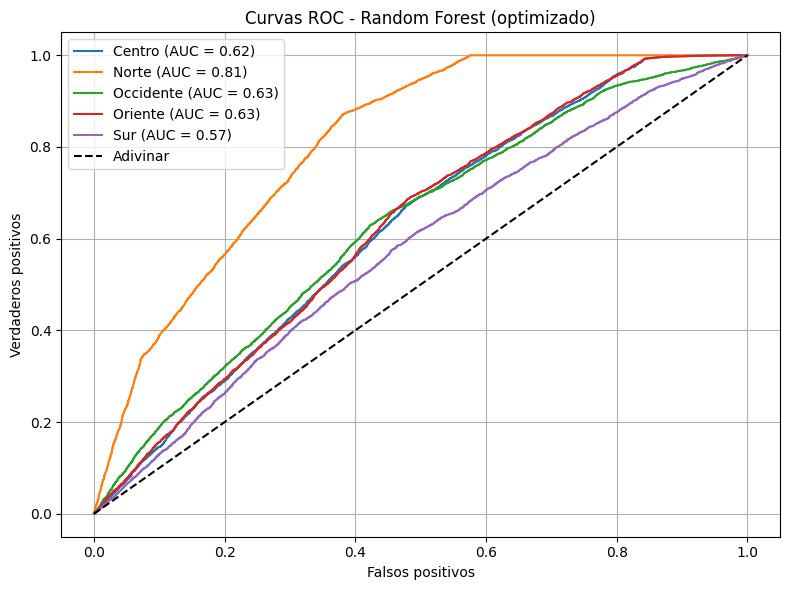


AUC promedio (macro): 0.6519


In [12]:

# Curvas ROC
plt.figure(figsize=(8, 6))
auc_scores = []

for i, class_label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc = roc_auc_score(y_test == i, y_proba[:, i])
    auc_scores.append(auc)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.title("Curvas ROC - Random Forest (optimizado)")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# AUC promedio
auc_macro = np.mean(auc_scores)
print(f"\nAUC promedio (macro): {auc_macro:.4f}")


### **SVC optimizado con SGDClassifier,  LinearSVC, RBF SVM con Fourier**

#### **SGDClassifier**

In [ ]:
# === Tomar la misma muestra de datos que SVC benchmark ===
df_sampled = df.sample(n=70000, random_state=42)

# === Definir features y target ===
features = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M',
            'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF',
            'T2MDEW', 'T2MWET', 'WS50M', 'SolarIndex']

X = df_sampled[features]
y = df_sampled['LOCALITY_encoded']

# === División y escalado ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [15]:

from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Definir modelo SGDClassifier como SVM (hinge loss) ===
sgd_svm = SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3)

# === Validación cruzada (accuracy) ===
cv_scores = cross_val_score(sgd_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento y predicción (con tiempo) ===
start_time = time.time()
sgd_svm.fit(X_train_scaled, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (SGDClassifier): {elapsed_time:.4f} segundos")

# === Predicción y métricas ===
y_pred = sgd_svm.predict(X_test_scaled)
print("=== Classification Report (SGDClassifier) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))




Cross-validation scores: [0.20693878 0.23938776 0.26377551 0.24765306 0.24877551]
Promedio de accuracy en CV: 0.2413061224489796
Tiempo de cómputo (SGDClassifier): 0.7831 segundos
=== Classification Report (SGDClassifier) ===
              precision    recall  f1-score   support

      Centro       0.21      0.35      0.27      4161
       Norte       0.32      0.07      0.12      4239
   Occidente       0.18      0.09      0.12      4196
     Oriente       0.18      0.37      0.25      4176
         Sur       0.25      0.16      0.20      4228

    accuracy                           0.21     21000
   macro avg       0.23      0.21      0.19     21000
weighted avg       0.23      0.21      0.19     21000



#### **LinearSVC**

In [16]:
from sklearn.svm import LinearSVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Definir modelo LinearSVC ===
linear_svc = LinearSVC(random_state=42, max_iter=2000)

# === Validación cruzada (accuracy) ===
cv_scores = cross_val_score(linear_svc, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento y predicción (con tiempo) ===
start_time = time.time()
linear_svc.fit(X_train_scaled, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (LinearSVC): {elapsed_time:.4f} segundos")

# === Predicción y métricas ===
y_pred = linear_svc.predict(X_test_scaled)
print("=== Classification Report (LinearSVC) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Cross-validation scores: [0.28683673 0.28255102 0.27897959 0.28908163 0.29102041]
Promedio de accuracy en CV: 0.2856938775510204
Tiempo de cómputo (LinearSVC): 0.8366 segundos
=== Classification Report (LinearSVC) ===
              precision    recall  f1-score   support

      Centro       0.23      0.08      0.12      4161
       Norte       0.31      1.00      0.47      4239
   Occidente       0.22      0.06      0.09      4196
     Oriente       0.26      0.06      0.10      4176
         Sur       0.25      0.22      0.23      4228

    accuracy                           0.28     21000
   macro avg       0.25      0.28      0.20     21000
weighted avg       0.25      0.28      0.20     21000



#### **Fourier**

In [22]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
# === División y escalado ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Aproximación del kernel RBF con Fourier Features ===
rbf_feature = RBFSampler(gamma=0.1, random_state=42, n_components=500)
rbf_svm = make_pipeline(rbf_feature, SGDClassifier(loss='hinge', random_state=42))

# === Validación cruzada (accuracy) ===
cv_scores = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Promedio de accuracy en CV:", cv_scores.mean())

# === Entrenamiento y predicción (con tiempo) ===
start_time = time.time()
rbf_svm.fit(X_train_scaled, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cómputo (RBF SVM con Fourier): {elapsed_time:.4f} segundos")

# === Predicción y métricas ===
y_pred = rbf_svm.predict(X_test_scaled)
print("=== Classification Report (RBF SVM con Fourier) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Cross-validation scores: [0.21867347 0.20653061 0.20785714 0.26142857 0.2494898 ]
Promedio de accuracy en CV: 0.22879591836734697
Tiempo de cómputo (RBF SVM con Fourier): 3.3366 segundos
=== Classification Report (RBF SVM con Fourier) ===
              precision    recall  f1-score   support

      Centro       0.24      0.40      0.30      4161
       Norte       0.31      1.00      0.47      4239
   Occidente       0.33      0.00      0.00      4196
     Oriente       0.25      0.02      0.03      4176
         Sur       0.55      0.00      0.00      4228

    accuracy                           0.28     21000
   macro avg       0.34      0.28      0.16     21000
weighted avg       0.34      0.28      0.16     21000



## **Conclusiones**

Antes de comparar los modelos optimizados, es fundamental evaluar el rendimiento general de todos los modelos benchmark implementados. A continuación, se resume el desempeño de cada uno en términos de precisión, recall, exactitud, f1-score y AUC promedio. Esta tabla permite observar de forma clara cuáles modelos ofrecieron mejores resultados desde su configuración base y sirve como referencia para identificar aquellos con mayor potencial de mejora tras su optimización.

| Modelo                   | precision | recall | accuracy | f1-score | AUC    |
|--------------------------|-----------|--------|----------|----------|--------|
| Clasificación Bayesiana | 0.25      | 0.28   | 0.28     | 0.19     | 0.5862 |
| K-NN                    | 0.19      | 0.22   | 0.22     | 0.19     | 0.5015 |
| Ridge (L2)              | 0.26      | 0.28   | 0.28     | 0.21     | 0.6008 |
| Lasso (L1)              | 0.26      | 0.28   | 0.28     | 0.21     | 0.6007 |
| Random Forest           | 0.12      | 0.16   | 0.16     | 0.13     | 0.4625 |
| XGBoost                 | 0.23      | 0.28   | 0.28     | 0.22     | 0.6318 |
| SVM                     | 0.26      | 0.29   | 0.29     | 0.21     | 0.5886 |




Al observar los resultados, se destaca que el modelo XGBoost presenta el mejor balance general entre métricas, con un AUC macro de 0.6318 y un f1-score ligeramente superior al resto. Le siguen los modelos Ridge y Lasso, que si bien empatan en precisión, recall y f1-score, muestran un AUC también competitivo (ambos en torno a 0.60), lo que sugiere una capacidad aceptable de diferenciación entre clases incluso sin ajustes adicionales.

El modelo Naive Bayes, a pesar de su simplicidad, logra un AUC de 0.5862 y una exactitud de 28 %, superando incluso a K-NN, que tuvo un rendimiento más bajo de forma general. Este último no logró destacarse en ninguna métrica clave, con valores cercanos al azar, lo que refleja sus limitaciones para capturar estructuras útiles en este conjunto de datos.

Random Forest, sorprendentemente, fue el modelo con desempeño más bajo, tanto en exactitud como en AUC (0.4625), evidenciando que su versión no optimizada no logró adaptarse bien a la naturaleza multiclase del problema. Por otro lado, el SVM, aunque fue entrenado con una muestra reducida por limitaciones computacionales, logró métricas similares a Ridge y Lasso, incluyendo el segundo mejor recall macro (0.29) y un AUC de 0.5886, lo que indica que, con más recursos o ajustes, podría ser una alternativa sólida.

Estos resultados iniciales marcan una base clara para analizar las mejoras introducidas por las versiones optimizadas de cada modelo.